# In this notebook, we're going to cover some of the most fundamental concepts of tensors using Tensorflow.

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python Functions)
* Using GPUs with TensorFlow (or TPUs)
* Excercises given to try

## Introduction to Tensors

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar 

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimenstion of a tensor (ndim stand for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a Vector Shape(a, b) indicates a = rows & b = columns
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our Vector
vector.ndim

1

In [ ]:
# Create a matrix
matrix = tf.constant([[10,10], [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [ 7, 10]], dtype=int32)>

In [ ]:
# Check the dimension of our Matrix
matrix.ndim

2

In [ ]:
# Create another matrix
# Going to specify the data type with "dtype" parameter
# Dot after a integer in python means: Signals a float number (1. => 1.0)
another_matrix = tf.constant([[10., 7.], [2., 8.], [6., 7.]], dtype=tf.float16) 
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 2.,  8.],
       [ 6.,  7.]], dtype=float16)>

In [ ]:
# Getting the Dimensions of Another_Matrix => Total of elements inside the shape
another_matrix.ndim

2

In [ ]:
# Let's create a Tensor
tensor = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
# Check number of Dimensions of Tensor
tensor.ndim

3

What we've created so far:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers, where n can be any number, a 0-dimensional tensor is scalar, a 1-dimensional tensor is a vector

## Creating Tensor with `tf.Variable`

In [ ]:
# Create the same Tensor with tf.Variable() as above
# Take note on the errors that constant (const) aren't changeable/iterable where Variables are (var)
changeable_tensor = tf.Variable([10, 7]) #Vector
unchangeable_tensor = tf.constant([10, 7]) #Vector

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try and change one of the elements in our changeable_tensor
changeable_tensor[0] = 7

TypeError: ignored

In [ ]:
# How about we try .assign()

changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Let's try and change one of the elements in our unchangeable_tensor

unchangeable_tensor[0] = 7

TypeError: ignored

In [ ]:
# How about we try .assign()
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: ignored

⚡**Note:** Rarely in practice will you need to decide whether to use `tf.constant()` or `tf.Variable()` to create tensors, as TensFlow does this for you. However, if in doubt, use `tf.constant` and change it later if needed.

### Creating random Tensors
Random Tensors are tensors of some abitrary size which contain random numbers

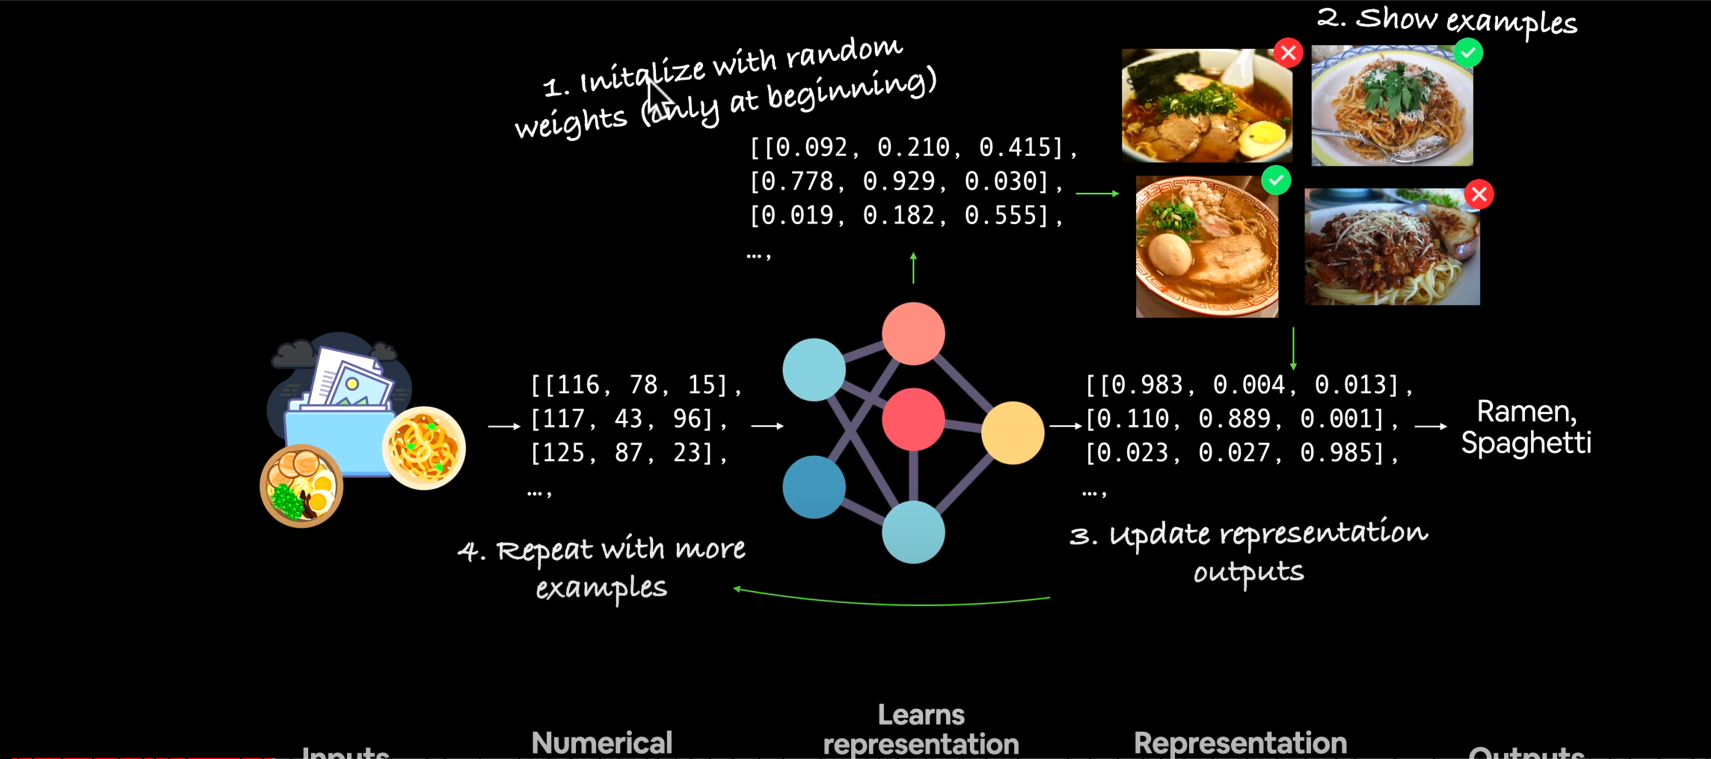

In [ ]:
# Create two random but the same tensors "tf.random.uniform"
# Uniform distribution -> sometimes also known as a rectangular distribution, is a distribution that has constant probability
# tf.random.normal -> outputs random values from a normal distribution
# Distribution is a base class for constructing and organizing properties of random variables
# from_seed -> A seed is a 1024-bit unsigned integer represented either as a Python integer 
#   or a vector of integers. Seeds shorter than 1024-bit will be padded. The padding, the internal 
#   structure of a seed and the way a seed is converted to a state are all opaque (unspecified). 
#   The only semantics specification of seeds is that two different seeds are likely to produce two 
#   independent generators (but no guarantee).

random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(67) # or 42 working off of the previous seed 
random_2 = random_2.normal(shape=(3,2))


# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.14833727, -1.2846565 ],
        [ 0.5484313 ,  0.10596129],
        [ 0.21793836,  0.7063839 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

## Shuffle the order of elements in a Tensor
⚡ This allows us to learn different Images at the same time, allowing us to adjust the weight of our tensors based on the patterns found from different images, for example identifying between a "Pizza" or a "Soup" Image, in a way this increases speed regarding to our learning process.

⌛ It looks like if we want our shuffled tensors to be in the same order, we have to use our global random seed as well as the operation random seed:
> Rule 4: If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherint order doesn't effect the learning)

not_shuffled = tf.constant([[10, 7], [3, 4], [2, 5]])

# shuffle our non shuffle tensor
tf.random.set_seed(42) # global level seed
tf.random.shuffle(not_shuffled, seed=42) # operation level seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

## Other ways to make Tensors

In [ ]:
# creating a tensors with all elements set to 1
tf.ones([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Create a Tensor of all zero's
tf.zeros([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### You can also turn NumPy arrays into Tensors

⚡ The main difference between NumPy and TensorFlow, is that tensors can be run on a GPU (much faster for numerical computing). 

In [ ]:
# You can also turn NumPy arrays into Tensors
import numpy as np

numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 - 25
numpy_A
# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
# Taking our generayed array with NumPy to a Tensor
# If you want to re-ajust the shape of the array, it must add up to same number of elements in the array (numpy_A => 24 elements in array)
# 2 * 3 * 4 = 24
# 3 * 8 = 24

A = tf.constant(numpy_A, shape=(2,3,4)) #Tensor
B = tf.constant(numpy_A) #Vector

A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting information from Tensors
When dealing with Tensors, you want to be aware of the following attributes:
* ***Shape*** - The length of each of the dimensions of a tensor. `tensor.shape`
* ***Rank*** - The number of tensor dimensions, A scalar is rank 0, a vector is rank 1, a matrix is rank 2, a tensor has a rank n. `tensor.ndim`
* ***Axis*** or Dimension - A particular dimensions of a tensor. `tensor[0], tensor[:, 1]...`
* ***Size*** - The total number of items in the tensor.`tf,size(tensor)`

In [ ]:
# Create a rank 4 tensor (4 dimensios)

rank_4_tensor = tf.zeros([2,3,4,5]) # Shape => dimensions

rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Getting the first index of the rank 4 tensor
# Take note on how the shape changes
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
# Getting the shape, size and number of dimensions of our rank 4 tensor
# 2 * 3 * 4 * 5 => 120 elements
rank_4_tensor.shape, tf.size(rank_4_tensor), rank_4_tensor.ndim

(TensorShape([2, 3, 4, 5]), <tf.Tensor: shape=(), dtype=int32, numpy=120>, 4)

In [ ]:
# Get varius attributes of our tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of Dimensions: ", rank_4_tensor.ndim)
print("Shape of the tensor: ", rank_4_tensor.shape)
print("Number of elements in our 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1]) # -1 to access our last axis
print("Totla number of elements in our tensor: ", tf.size(rank_4_tensor).numpy()) # converting to NumPy integer ".numpy()"

Datatype of every element:  <dtype: 'float32'>
Number of Dimensions:  4
Shape of the tensor:  (2, 3, 4, 5)
Number of elements in our 0 axis:  2
Elements along the last axis:  5
Totla number of elements in our tensor:  120


### Indexing Tensors
Tensors can be indexed just like python lists.

In [ ]:
# Array example
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [ ]:
# Get the first two elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from each dimension from each index except for the final one
# By only applying the ":" on it's own, it means to return the whole thing
# Shape=(2, 3, 4, 5) original
rank_4_tensor[:1,:1,:1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tester (2 dimensions)
rank_2_tensor = tf.constant([[10,7],[3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
# Get the last Item of each row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [ ]:
# Adding a extra dimension to our rank 2 tensor
# adds a new axis.

# If you want to add a new axis at the beginning of the tensor, use: expanded_2 = a[tf.newaxis, :]
# otherwise (at the end): expanded_2 = a[:,tf.newaxis]
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis 
# Expanding the last axis
tf.expand_dims(rank_2_tensor, axis=-1) # '-1' means expanding the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [ ]:
# Expanding the 0-axis (first)
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

### Manipulating Tensors (Tensor operations)

**Basic Operations**
`+`, `-`, `*`, `/`

In [ ]:
# You can add values to a tensor using the addition operator

tensor = tf.constant([[10,7], [3,4]])

tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# Orignal tensor is unchanged, but if we were to change it we would do the following (basic)
tensor = tensor + 10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[200, 170],
       [130, 140]], dtype=int32)>

In [ ]:
# Subtraction
tensor - 20

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# We can use the tensorflow built-in function too (The original Tensor is still unchanged)

tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[200, 170],
       [130, 140]], dtype=int32)>

***Matrix Multiplication***

In machine learning, matrix multiplication is one of the most common tensor operations

***There are two rules our matrix needs to fulfill:***
* The inner dimensions must much
* The resulting matrix has the shape of the outer dimensions

>matrixmultiplication.xyz

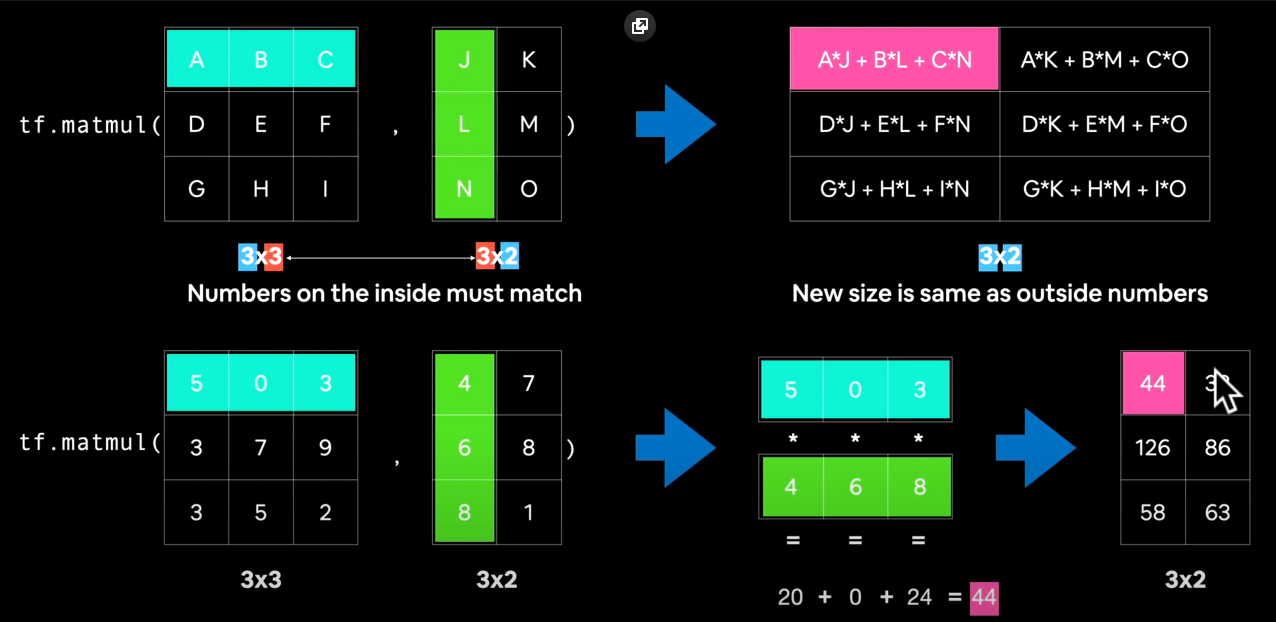

In [ ]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[20 17]
 [13 14]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[621, 578],
       [442, 417]], dtype=int32)>

In [ ]:
# Matrix Multiplication with Python operator "@"
tensor @ tensor #the "@" is actually meant for matrix multiplication in python

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[621, 578],
       [442, 417]], dtype=int32)>

In [ ]:
# Create a tensor (3,2) shape
x = tf.constant([[1,2], [3,4], [5,6]])
z = tf.constant([[7,8], [9,10], [11,12]])

tf.matmul(x,z)

InvalidArgumentError: ignored

In [ ]:
# Applying the rule set to matrix multiplication with the error above

# Let's change the shape of "z"
reshaped = tf.reshape(z, shape=(2,3))

# Now Matrix multiplication
tf.matmul(x, reshaped)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Try changing the shape of X instead of Z
tf.matmul(tf.reshape(z, shape=(2,3)), z)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[220, 244],
       [301, 334]], dtype=int32)>

In [ ]:
# Take note due to the order being changed, 2 is now being used towards the outer dimensions in the result
tf.reshape(x, shape=(2,3)).shape, z.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [ ]:
# Can do the same with transpose
# Difference between transpose and reshape is that transpose flips the axis's where reshape shuffles the tensor around in the shape you want.
x, tf.transpose(x), tf.reshape(x, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(x), z)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

📖 **Resource** Info and example of matrix multiplication: https://www.mathisfun.com/algebra/matrix-multiplying.html

**The dot product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
x,z

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Perform the dot product on X & Z (requires X & Z to be transposed)
tf.tensordot(tf.transpose(x), z, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# perform matrix multiplication between X & Z (transposed)
tf.matmul(x, tf.transpose(z))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix mulitplication between X & Z (reshaped)
tf.matmul(x,tf.reshape(z, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Check the values of Z, reshaped Z and transposed Z
print("Normal Z:")
print(z, "\n")

print("Z reshaped to (2,3)")
print(tf.reshape(z, shape=(2,3)), "\n")

print('Z transposed: ')
print(tf.transpose(z),"\n")

print("Matrix Multiplied: ")
print(tf.matmul(x, tf.transpose(z)))

Normal Z:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Z reshaped to (2,3)
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Z transposed: 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 

Matrix Multiplied: 
tf.Tensor(
[[ 23  29  35]
 [ 53  67  81]
 [ 83 105 127]], shape=(3, 3), dtype=int32)


💡 generally when performing **Matrix Multiplication** on two tensors and one of the axes doesn't line up, you will transpose rather than reshape one of the tensors to satisfy the multiplication within the given rule set of matrix multiplication.

## Changing the data type of a tensor

In [ ]:
# Create a new tensor with the default data type (float32)

B = tf.constant([1.7, 2.7])
C = tf.constant([1,2,3,4])
print("B => Float32: ",B.dtype,"\n")
print("C => Int32: ", C.dtype)

B => Float32:  <dtype: 'float32'> 

C => Int32:  <dtype: 'int32'>


💡 ***Mixed Precision***: is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory. Today, most models use the float32 dtype, which takes 32 bits of memory. However, there are two lower-precision dtypes, float16 and bfloat16, each which take 16 bits of memory instead. Modern accelerators can run operations faster in the 16-bit dtypes, as they have specialised hardware to run 16-bit computations and 16-bit dtypes can be read from memory alot faster.

In [ ]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 2.7], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from Int32 to Float32
E = tf.cast(C, dtype=tf.float32)
E, E.dtype

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>,
 tf.float32)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16, E_float16.dtype

(<tf.Tensor: shape=(4,), dtype=float16, numpy=array([1., 2., 3., 4.], dtype=float16)>,
 tf.float16)

## Aggregating Tensors

Aggregating tensors = condensing them from multpile values down to smaller amount of values.

In [ ]:
# Creating the Tensor
D = tf.constant([-7,-10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Getting the absolute value (getting all the negative numbers & turning them into positive numbers)
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of the tensor

In [ ]:
# Creating a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([23, 21, 58, 60, 41, 71, 23, 19,  5, 53, 66, 18, 56, 98, 48, 85, 63,
       19, 36, 62, 19, 68,  3, 99, 67, 39, 84, 44, 80, 29,  8, 66, 71, 83,
       27, 97, 82, 37, 40, 41, 72, 51, 49, 67, 24, 82, 41, 90, 45,  1])>

In [ ]:
print("Size: ", tf.size(E).numpy(), "\n")
print("Nr Dimensions: ", E.ndim, "\n")
print("Shape: ", E.shape)


Size:  50 

Nr Dimensions:  1 

Shape:  (50,)


In [ ]:
# Find the minimum
tf.reduce_min(E).numpy()

1

In [ ]:
# Find the maximum
tf.reduce_max(E).numpy()

99

In [ ]:
# Find the mean
tf.reduce_mean(E).numpy()

50

In [ ]:
# Find the sum
tf.reduce_sum(E).numpy()

2531

🧰***Exercise***: With what has been learnt, find the variance and standard deviation of our E tensor.

In [ ]:
# Find the variance of E tensor, we need access to tensorflow probability
import tensorflow_probability as tfp
tfp.stats.variance(E).numpy()

707

In [ ]:
# Making use of a alternative method for finding the variance
tf.math.reduce_variance(tf.cast(E, dtype=tf.float16)).numpy()

707.0

In [ ]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32)).numpy()

26.5939

## Find the positional Maximum & Minimum



In [ ]:
# Create new tensor for finding the positional min & max
tf.random.set_seed(42) # Setting the global seed
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# Find the positional max
tf.argmax(F).numpy()

42

In [ ]:
# Index on our largest position
F[tf.argmax(F)].numpy()

0.9671384

In [ ]:
# Find the largest value of F
tf.reduce_max(F).numpy()

0.9671384

In [ ]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Finding the min position
F[tf.argmin(F)].numpy()

0.009463668

In [ ]:
# Finding the min value
tf.reduce_min(F).numpy()

0.009463668

In [ ]:
# Check for equality
F[tf.argmin(F)] == tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Squeezing a Tensor (removing all single dimensions)

In [ ]:
# Create a tensor to get started
tf.random.set_seed(42) # Setting the global seed
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50)) #adding a few single dimensions to the start
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
# Squeezing our tensor (removing single dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

### One-hot in coding tensors (form of numerical encoding)

💡 For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer reprenstation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [ ]:
# Create a list of indices
some_list = [0,1,2,3] # could be red, green, blue & purple

# One-hot encode our list of indices
tf.one_hot(some_list, depth=4).numpy()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="Hello", off_value="Bye").numpy()

array([[b'Hello', b'Bye', b'Bye', b'Bye'],
       [b'Bye', b'Hello', b'Bye', b'Bye'],
       [b'Bye', b'Bye', b'Hello', b'Bye'],
       [b'Bye', b'Bye', b'Bye', b'Hello']], dtype=object)

### A Few mathmatical operations
* Squaring 
* Log
* Square root

In [ ]:
# Create a new tensor
H= tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Sqaure it
tf.square(H).numpy()

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [ ]:
# Square root (will error, method requires non-int type, so changing it to float32/float16 would work like below)
tf.sqrt(tf.cast(H, dtype=tf.float32)).numpy()


array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)

In [ ]:
# Find the Log (will error, method requires non-int type, so changing it to float32/float16 would work like below)
tf.math.log(tf.cast(H, dtype=tf.float32)).numpy()

array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)

### Tensors and NumPy

TensorFlow reacts beautifully with NumPy arrays



In [ ]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3,6,7,8]))
J

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 6, 7, 8])>

In [ ]:
# Convert our tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([3, 6, 7, 8]), numpy.ndarray)

In [ ]:
# Convert tensor J to NumPy array
J.numpy(), type(J.numpy())

(array([3, 6, 7, 8]), numpy.ndarray)

In [ ]:
# The default type of each are slighlty different
numpy_J = tf.constant(np.array([3,7,9,10]))
tensor_J = tf.constant([3,7,9,10])

# Be aware if you do convert your NumPy array to Tensors, they may have a different 
# data type where you would create your Tensor directly from TensorFlow

# Check the data types of each
numpy_J.dtype,tensor_J.dtype

(tf.int64, tf.int32)